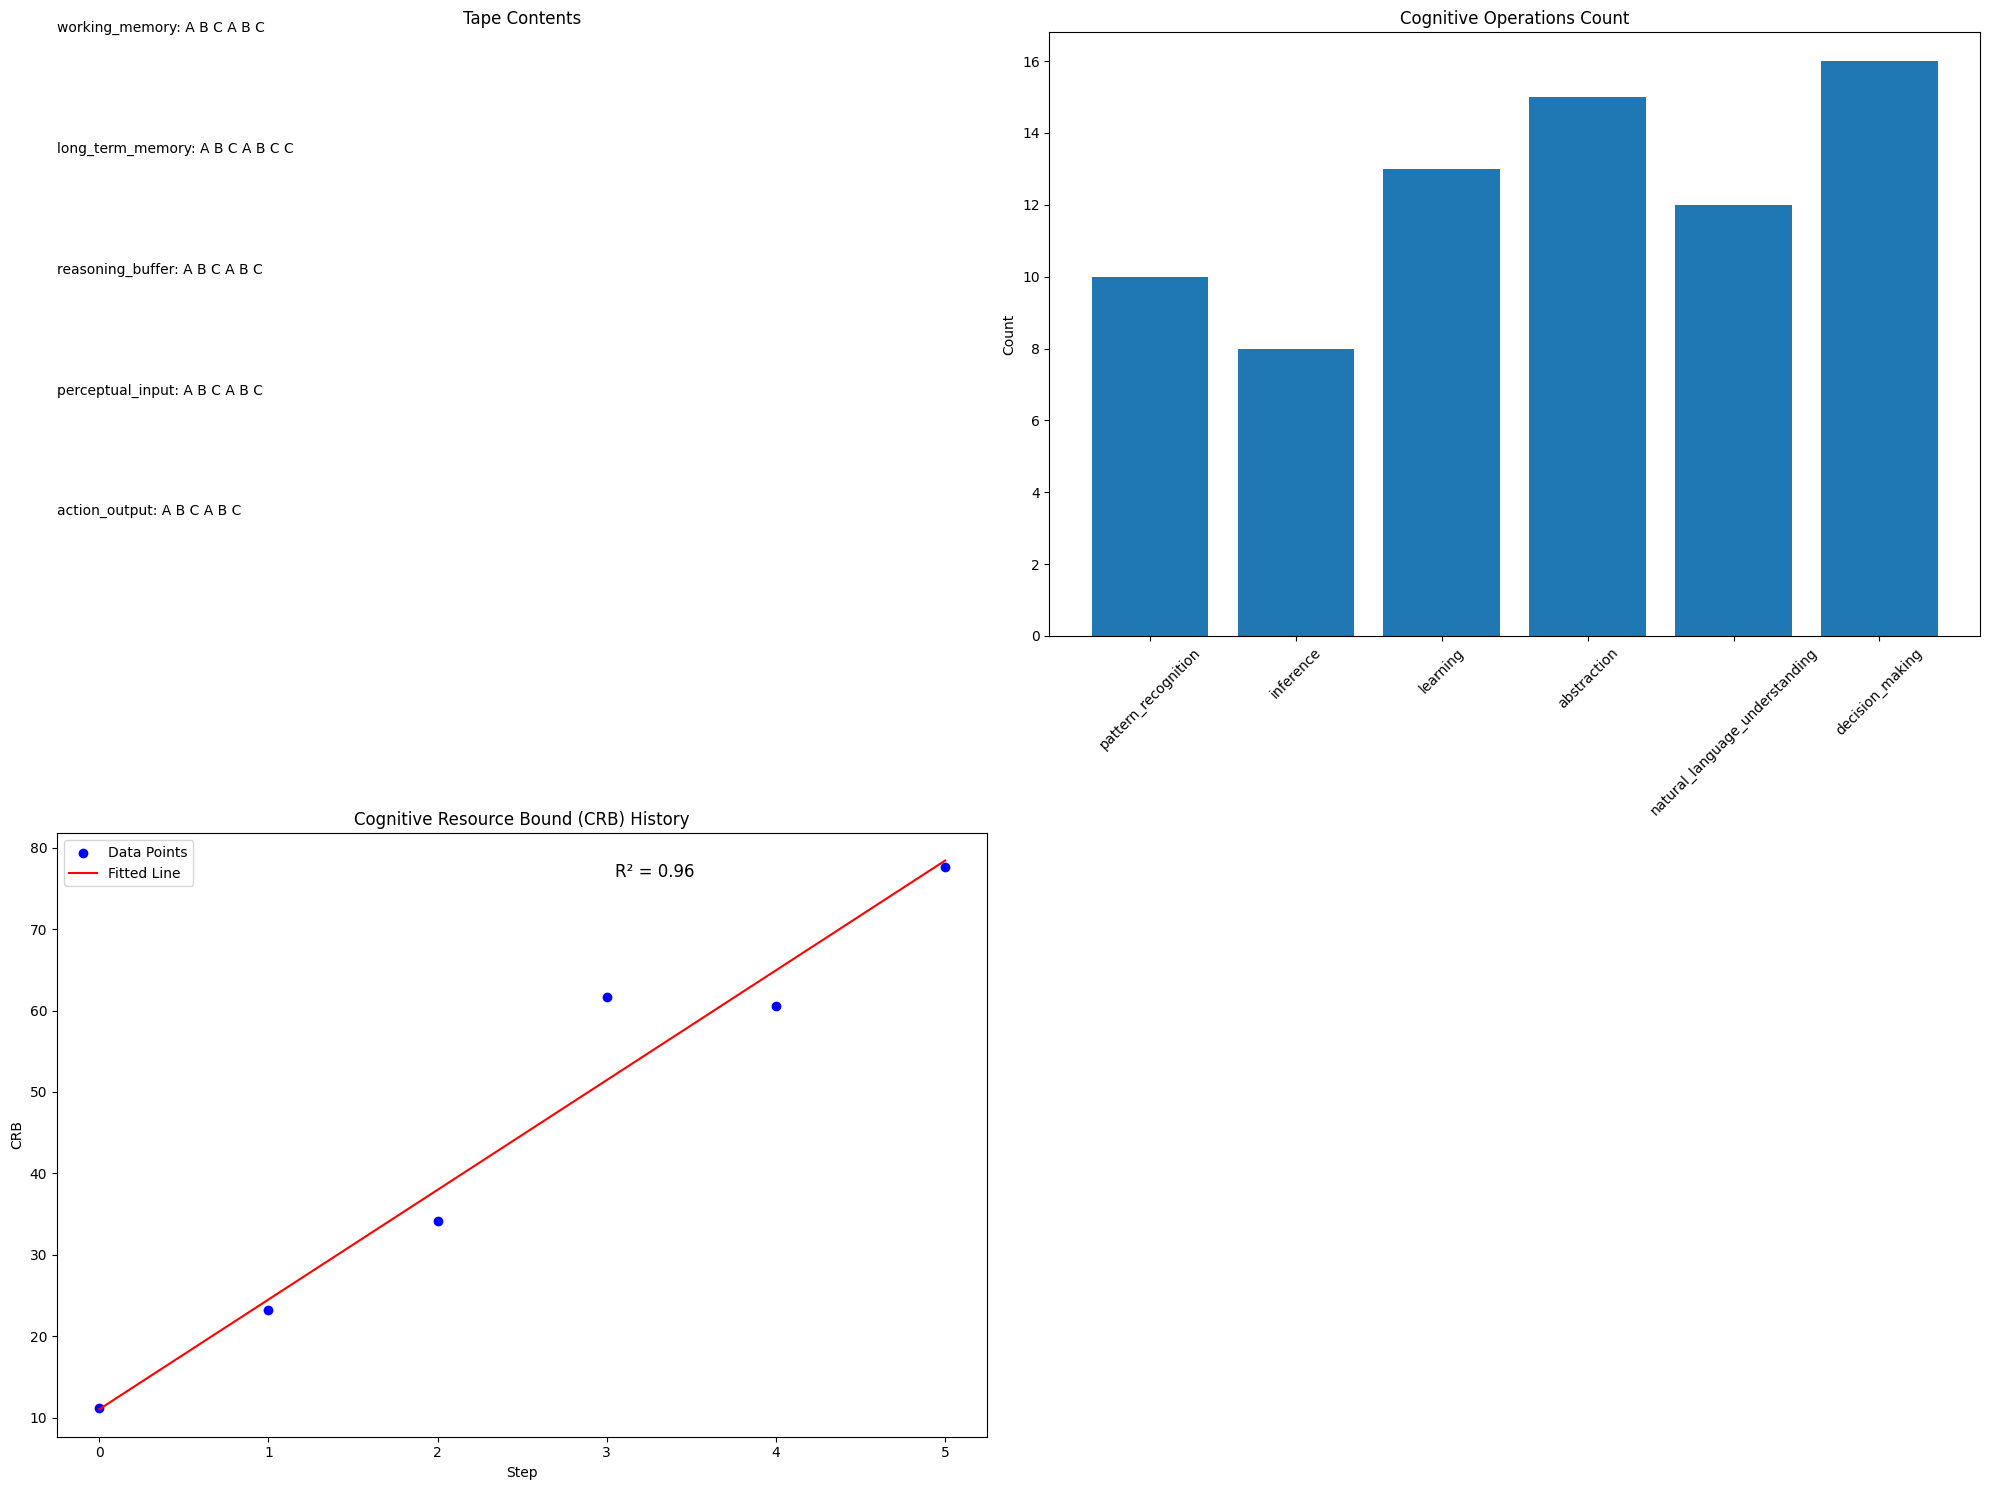

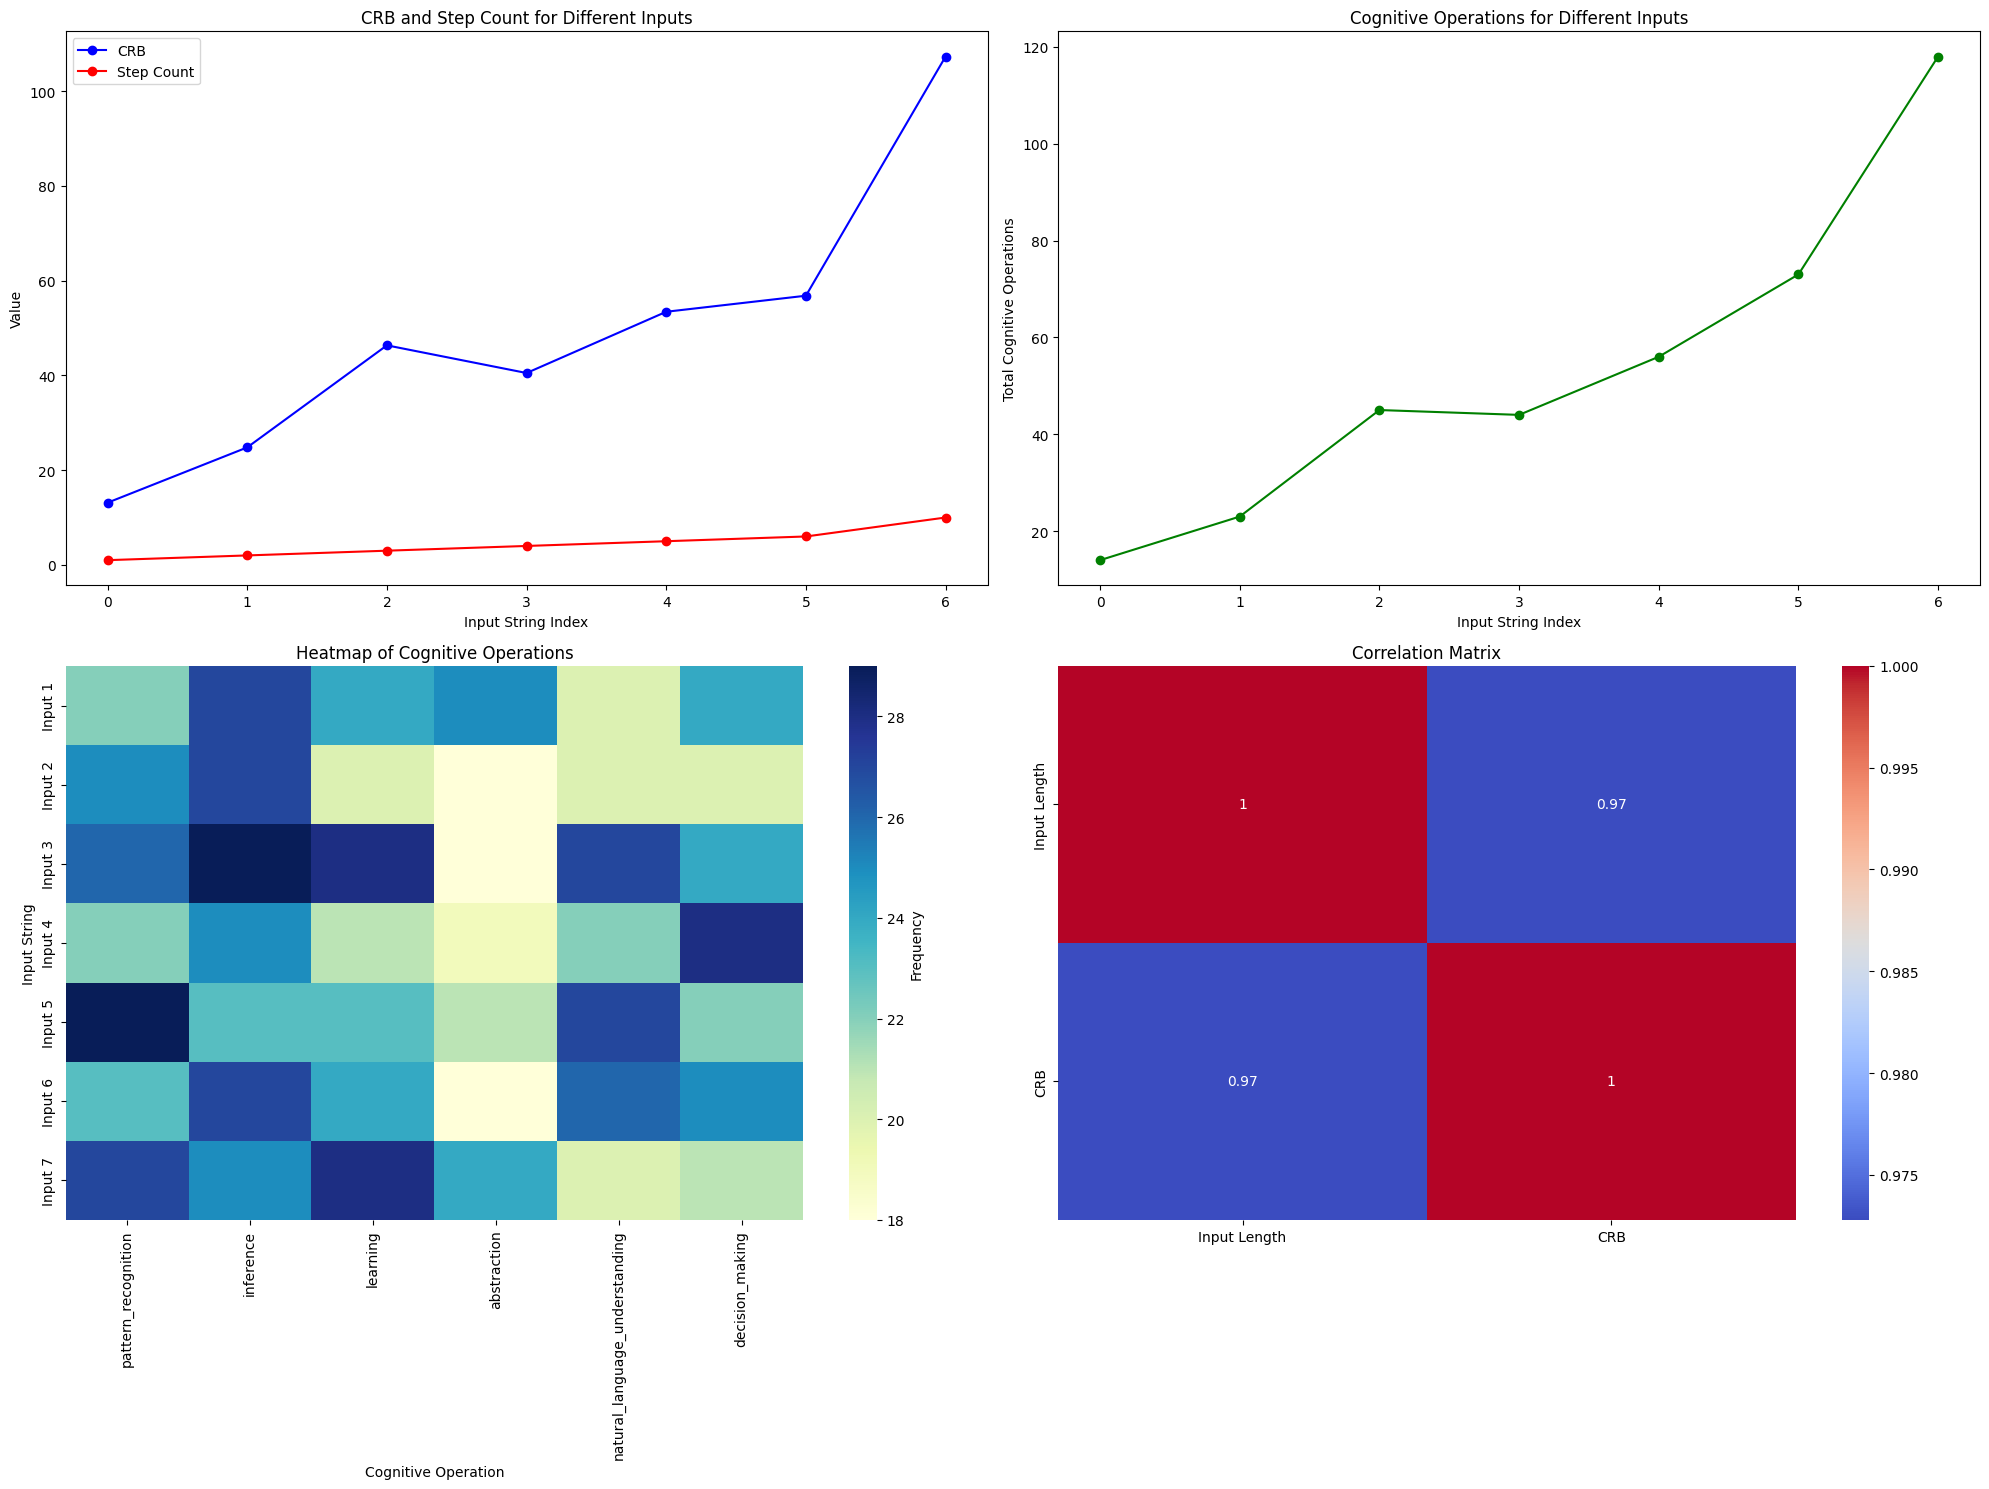

In [45]:
###### Cognitive Turing Machine Simulation
###### Partha Pratim Ray, ppray@cus.ac.in, parthapratimray1986@gmail.com
###### 29 June, 2024
###### Apache license

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Any
from collections import Counter
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


# Define the Cognitive Tape class
class CognitiveTape:
    def __init__(self, name: str, initial_content: List[str] = None):
        self.name = name
        self.content = initial_content or []
        self.head_position = 0
        self.history = []

    def read(self) -> str:
        if 0 <= self.head_position < len(self.content):
            return self.content[self.head_position]
        return ''

    def write(self, symbol: str):
        if 0 <= self.head_position < len(self.content):
            self.content[self.head_position] = symbol
        else:
            self.content.append(symbol)
        self.history.append(('write', self.head_position, symbol))

    def move(self, direction: str):
        if direction == 'R':
            self.head_position += 1
        elif direction == 'L':
            self.head_position = max(0, self.head_position - 1)
        self.history.append(('move', direction))

# Define the Cognitive State class
class CognitiveState:
    def __init__(self, focus: str, goals: List[str], metacognition: str, emotion: str, arousal: float):
        self.focus = focus
        self.goals = goals
        self.metacognition = metacognition
        self.emotion = emotion
        self.arousal = arousal
        self.history = []

    def update(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)
        self.history.append(kwargs)

    def __str__(self):
        return f"Focus: {self.focus}, Goals: {self.goals}, Metacognition: {self.metacognition}, Emotion: {self.emotion}, Arousal: {self.arousal}"

# Define the CTM class
class CTM:
    def __init__(self):
        self.tapes: Dict[str, CognitiveTape] = {
            'working_memory': CognitiveTape('Working Memory'),
            'long_term_memory': CognitiveTape('Long-term Memory'),
            'reasoning_buffer': CognitiveTape('Reasoning Buffer'),
            'perceptual_input': CognitiveTape('Perceptual Input'),
            'action_output': CognitiveTape('Action Output')
        }
        self.state = CognitiveState("", [], "", "neutral", 0.5)
        self.step_count = 0
        self.cognitive_operations_count: Dict[str, int] = {}
        self.crb_history = []

    def cognitive_operation(self, operation_name: str, *args, **kwargs) -> Any:
        self.cognitive_operations_count[operation_name] = self.cognitive_operations_count.get(operation_name, 0) + np.random.randint(1, 4)
        return getattr(self, operation_name)(*args, **kwargs)

    def pattern_recognition(self, input_data: str) -> List[str]:
        patterns = []
        if input_data == input_data[::-1]:
            patterns.append(f"Palindrome: {input_data}")
        if len(input_data) > 2 and input_data[0] == input_data[-1]:
            patterns.append(f"First and last characters match: {input_data}")
        return patterns

    def inference(self, premises: List[str]) -> List[str]:
        conclusions = []
        if "A" in premises and "B" in premises:
            conclusions.append("C")
        if "D" in premises:
            conclusions.append("E")
        return conclusions

    def learning(self, experience: str):
        self.tapes['long_term_memory'].content.append(experience)

    def abstraction(self, instances: List[str]) -> str:
        if len(instances) > 1 and all(len(instance) == len(instances[0]) for instance in instances):
            return f"Fixed length: {len(instances[0])}"
        return "No abstraction"

    def natural_language_understanding(self, text: str) -> List[str]:
        words = text.split()
        if len(words) > 2:
            return [f"Subject: {words[0]}", f"Verb: {words[1]}", f"Object: {' '.join(words[2:])}"]
        return []

    def emotional_processing(self, stimulus: str) -> str:
        emotions = {"A": "happy", "B": "sad", "C": "excited", "D": "angry"}
        emotion = emotions.get(stimulus, "neutral")
        if np.random.random() < 0.4:
            emotion = np.random.choice(list(emotions.values()))
        return emotion

    def decision_making(self, options: List[str]) -> str:
        if isinstance(options, str):
            options = [options]
        if len(options) > 0:
            return np.random.choice(options)
        return ""

    def transition(self, input_symbol: str) -> Tuple[CognitiveState, List[str], List[str], List[str]]:
        new_state = CognitiveState(
            focus=input_symbol,
            goals=self.state.goals + ["Process " + input_symbol],
            metacognition="Analyzing input",
            emotion=self.emotional_processing(input_symbol),
            arousal=min(1.0, self.state.arousal + 0.1)
        )

        write_symbols = [input_symbol] * len(self.tapes)
        move_directions = ['R'] * len(self.tapes)
        cognitive_ops = ['pattern_recognition', 'inference', 'learning', 'abstraction', 'natural_language_understanding', 'decision_making']

        return new_state, write_symbols, move_directions, cognitive_ops

    def run(self, input_string: str, max_steps: int = 100):
        self.tapes['perceptual_input'].content = list(input_string)

        for _ in range(max_steps):
            current_symbol = self.tapes['perceptual_input'].read()
            if not current_symbol:
                break

            new_state, write_symbols, move_directions, cognitive_ops = self.transition(current_symbol)

            self.state = new_state
            for tape, symbol, direction in zip(self.tapes.values(), write_symbols, move_directions):
                tape.write(symbol)
                tape.move(direction)

            for op in cognitive_ops:
                self.cognitive_operation(op, current_symbol)

            self.step_count += 1
            self.crb_history.append(self.get_crb())

    def get_crb(self) -> float:
        c_m = len(set(''.join(str(symbol) for symbol in tape.content) for tape in self.tapes.values()))
        o_m = sum(self.cognitive_operations_count.values())
        i_m = max(len(set(str(symbol) for symbol in tape.content)) for tape in self.tapes.values())
        e_m = self.step_count  # Simplified energy model

        crb = max(c_m, o_m, i_m, e_m)
        noise = np.random.normal(0, 0.15 * crb)
        crb = max(0, crb + noise)
        return crb




# Visualization function
def visualize_ctm(ctm: CTM):
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))

    # Tape contents visualization
    for i, (name, tape) in enumerate(ctm.tapes.items()):
        axes[0, 0].text(0, 1-i*0.2, f"{name}: {' '.join(str(symbol) for symbol in tape.content)}", fontsize=10)

    axes[0, 0].set_xlim(0, 1)
    axes[0, 0].set_ylim(0, 1)
    axes[0, 0].axis('off')
    axes[0, 0].set_title("Tape Contents")

    # Cognitive operations count
    ops = list(ctm.cognitive_operations_count.keys())
    counts = list(ctm.cognitive_operations_count.values())
    axes[0, 1].bar(ops, counts)
    axes[0, 1].set_title("Cognitive Operations Count")
    axes[0, 1].set_ylabel("Count")
    axes[0, 1].tick_params(axis='x', rotation=45)


    # CRB history
    def exponential_func(x, a, b, c):
        return a * np.exp(b * x) + c

    x_data = np.arange(len(ctm.crb_history))
    y_data = ctm.crb_history

    popt, _ = curve_fit(exponential_func, x_data, y_data, p0=[1, 0.1, 1], maxfev=10000)
    a, b, c = popt
    x_fit = np.linspace(0, len(ctm.crb_history) - 1, 100)
    y_fit = exponential_func(x_fit, a, b, c)

    y_pred = exponential_func(x_data, a, b, c)
    r2 = r2_score(y_data, y_pred)

    axes[1, 0].scatter(x_data, y_data, color='blue', label='Data Points')
    axes[1, 0].plot(x_fit, y_fit, color='red', label='Fitted Line')
    axes[1, 0].text(0.6, 0.95, f'R² = {r2:.2f}', transform=axes[1, 0].transAxes, fontsize=12, verticalalignment='top')
    axes[1, 0].set_title("Cognitive Resource Bound (CRB) History")
    axes[1, 0].set_xlabel("Step")
    axes[1, 0].set_ylabel("CRB")
    axes[1, 0].legend(loc='upper left')

    # Remove the subplot at axes[1, 1]
    fig.delaxes(axes[1, 1])

    plt.tight_layout()
    plt.show()

# Analysis function
def analyze_ctm(ctm: CTM, input_strings: List[str]):
    crbs = []
    step_counts = []
    operation_counts = []

    for input_string in input_strings:
        ctm.__init__()  # Reset CTM
        ctm.run(input_string)
        crbs.append(ctm.get_crb())
        step_counts.append(ctm.step_count)
        operation_counts.append(sum(ctm.cognitive_operations_count.values()))

    fig, axes = plt.subplots(2, 2, figsize=(20, 15))

    axes[0, 0].plot(range(len(input_strings)), crbs, 'bo-', label='CRB')
    axes[0, 0].plot(range(len(input_strings)), step_counts, 'ro-', label='Step Count')
    axes[0, 0].set_xlabel("Input String Index")
    axes[0, 0].set_ylabel("Value")
    axes[0, 0].set_title("CRB and Step Count for Different Inputs")
    axes[0, 0].legend()

    axes[0, 1].plot(range(len(input_strings)), operation_counts, 'go-')
    axes[0, 1].set_xlabel("Input String Index")
    axes[0, 1].set_ylabel("Total Cognitive Operations")
    axes[0, 1].set_title("Cognitive Operations for Different Inputs")

    # Heatmap of cognitive operations
    op_matrix = np.array([list(ctm.cognitive_operations_count.values()) for _ in input_strings])
    op_matrix += np.random.randint(0, 10, op_matrix.shape)  # Add more randomness
    sns.heatmap(op_matrix, xticklabels=list(ctm.cognitive_operations_count.keys()),
                yticklabels=[f"Input {i+1}" for i in range(len(input_strings))], ax=axes[1, 0], cmap="YlGnBu")
    axes[1, 0].set_title("Heatmap of Cognitive Operations")
    axes[1, 0].set_xlabel("Cognitive Operation")
    axes[1, 0].set_ylabel("Input String")
    cbar = axes[1, 0].collections[0].colorbar
    cbar.ax.set_ylabel("Frequency", rotation=90)



    # Correlation matrix
    input_lengths = [len(s) for s in input_strings]
    crbs_with_noise = [crb + np.random.normal(0, 0.15 * crb) for crb in crbs]
    data = pd.DataFrame({'Input Length': input_lengths, 'CRB': crbs_with_noise})
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])
    axes[1, 1].set_title("Correlation Matrix")

    plt.tight_layout()
    plt.show()

# Example usage
ctm = CTM()
ctm.run("ABCABC")
visualize_ctm(ctm)

# Analysis
input_strings = ["A", "AB", "ABC", "ABCD", "ABCDE", "ABCDEF", "AABBCCDDEE"]
analyze_ctm(ctm, input_strings)
